In [25]:
import pandas as pd
import numpy as np
import os 
import statistics 
from pathlib import Path
from scipy.stats import ttest_rel
import matplotlib.pyplot as plt
import math
from statsmodels.stats.anova import AnovaRM
from numpy import mean, std, cov
from numpy.random import seed, randn
import random as rd
#from sklearn import preprocessing
#from sklearn import datasets
#from sklearn.preprocessing import StandardScaler
#from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib import pyplot
from __future__ import division
import sys
import scipy
from math import sqrt
import scipy.stats as stats
from scipy import stats 
from scipy.stats import t, pearsonr, sem, spearmanr
import seaborn as sns
from statistics import mean, stdev
import statsmodels.api as sm
import statsmodels.formula.api as smf
import math
import pingouin as pg
from pingouin import ttest
from scipy.special import logsumexp

In [26]:
current_dir = os.getcwd()
shortformdata = pd.read_csv('shortformdata.csv')
display(shortformdata)

,participant,condition_recode,salience_mean,choice,stress_mean,stress_mean.1,rej-acc,ifnegvalue,choicertmean,timebetween,age,sex,order,overallaffect,socialchoice,prop_socialchoice,social_left,social_decisionprice_mean,nonsocial_decisionprice_mean
0,59d5888d21977e0001d630f3,1,2.0,1.535714,7.0,7.0,-1.0,NaN,1.178571,NaN,NaN,NaN,NaN,7.50,999,0.535714,NaN,0.029333,0.029231
1,59d5888d21977e0001d630f3,2,3.5,1.633333,8.0,8.0,-1.0,NaN,1.100000,NaN,NaN,NaN,NaN,7.50,999,0.478261,0.0,0.030909,0.023333
2,5a09ebdf087f2e0001eae39f,1,2.5,1.571429,2.0,2.0,-1.0,NaN,2.214286,NaN,NaN,NaN,NaN,2.50,999,0.500000,NaN,0.030714,0.036429
3,5a09ebdf087f2e0001eae39f,2,3.5,1.633333,3.0,3.0,-1.0,NaN,1.233333,NaN,NaN,NaN,NaN,2.50,999,0.500000,0.0,0.042222,0.028889
4,5c5c451500b69200011bb8bf,1,1.5,1.333333,5.0,5.0,1.5,NaN,1.500000,NaN,NaN,NaN,NaN,4.25,1,0.666667,1.0,0.042000,0.036000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,6711f493bfc7c4e11953872d,2,3.5,1.413793,4.0,4.0,3.0,NaN,1.137931,NaN,NaN,NaN,NaN,5.50,999,0.608696,0.0,0.033571,0.027778
194,671469967e2a4f2e612e3846,1,2.0,1.766667,5.0,5.0,-2.5,NaN,1.466667,NaN,NaN,NaN,NaN,6.25,0,0.466667,0.0,0.027857,0.026875
195,671469967e2a4f2e612e3846,2,4.0,1.750000,7.5,7.5,-2.5,NaN,1.357143,NaN,NaN,NaN,NaN,6.25,999,0.450000,NaN,0.026667,0.030000
196,6722ca2b1f3ebd2d544608c3,1,1.5,1.714286,4.0,4.0,-2.5,NaN,0.928571,NaN,NaN,NaN,NaN,5.25,999,0.464286,NaN,0.031538,0.024667


In [27]:
#create sepeate variables with values for within each condition
rej = shortformdata.loc[shortformdata['condition_recode']==1].reset_index(drop=True)
acc = shortformdata.loc[shortformdata['condition_recode']==2].reset_index(drop=True)

print(len(rej))
print(len(acc))

99
99


In [9]:
display(rej)

,participant,condition_recode,salience_mean,choice,stress_mean,stress_mean.1,rej-acc,ifnegvalue,choicertmean,timebetween,age,sex,order,overallaffect,socialchoice,prop_socialchoice,social_left,social_decisionprice_mean,nonsocial_decisionprice_mean
0,59d5888d21977e0001d630f3,1,2.0,1.535714,7.0,7.0,-1.0,NaN,1.178571,NaN,NaN,NaN,NaN,7.50,999,0.535714,NaN,0.029333,0.029231
1,5a09ebdf087f2e0001eae39f,1,2.5,1.571429,2.0,2.0,-1.0,NaN,2.214286,NaN,NaN,NaN,NaN,2.50,999,0.500000,NaN,0.030714,0.036429
2,5c5c451500b69200011bb8bf,1,1.5,1.333333,5.0,5.0,1.5,NaN,1.500000,NaN,NaN,NaN,NaN,4.25,1,0.666667,1.0,0.042000,0.036000
3,5c9d004ee3b6c40015254526,1,2.5,1.714286,3.5,3.5,0.5,NaN,2.500000,NaN,NaN,NaN,NaN,3.25,999,0.500000,NaN,0.026429,0.026429
4,5cc3f0f9fdb33500018c5eeb,1,2.0,1.733333,7.0,7.0,-1.5,NaN,0.833333,NaN,NaN,NaN,NaN,7.75,0,0.366667,0.0,0.022727,0.030526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,67094d6215b6d0fe3e8c3e39,1,2.0,1.266667,9.0,9.0,2.5,NaN,1.200000,NaN,NaN,NaN,NaN,7.75,0,0.600000,1.0,0.043333,0.041667
95,670d326c55fa3d6f10ebe253,1,2.0,1.466667,6.0,6.0,-1.0,NaN,1.733333,NaN,NaN,NaN,NaN,6.50,1,0.600000,0.0,0.036111,0.028333
96,6711f493bfc7c4e11953872d,1,2.0,1.571429,7.0,7.0,3.0,NaN,1.928571,NaN,NaN,NaN,NaN,5.50,999,0.607143,NaN,0.033529,0.026364
97,671469967e2a4f2e612e3846,1,2.0,1.766667,5.0,5.0,-2.5,NaN,1.466667,NaN,NaN,NaN,NaN,6.25,0,0.466667,0.0,0.027857,0.026875


In [10]:
display(acc)

,participant,condition_recode,salience_mean,choice,stress_mean,stress_mean.1,rej-acc,ifnegvalue,choicertmean,timebetween,age,sex,order,overallaffect,socialchoice,prop_socialchoice,social_left,social_decisionprice_mean,nonsocial_decisionprice_mean
0,59d5888d21977e0001d630f3,2,3.5,1.633333,8.0,8.0,-1.0,NaN,1.100000,NaN,NaN,NaN,NaN,7.50,999,0.478261,0.0,0.030909,0.023333
1,5a09ebdf087f2e0001eae39f,2,3.5,1.633333,3.0,3.0,-1.0,NaN,1.233333,NaN,NaN,NaN,NaN,2.50,999,0.500000,0.0,0.042222,0.028889
2,5c5c451500b69200011bb8bf,2,3.0,1.357143,3.5,3.5,1.5,NaN,1.464286,NaN,NaN,NaN,NaN,4.25,999,0.642857,NaN,0.037778,0.026000
3,5c9d004ee3b6c40015254526,2,3.5,1.666667,3.0,3.0,0.5,NaN,2.333333,NaN,NaN,NaN,NaN,3.25,0,0.450000,1.0,0.030000,0.024545
4,5cc3f0f9fdb33500018c5eeb,2,5.0,1.428571,8.5,8.5,-1.5,NaN,1.214286,NaN,NaN,NaN,NaN,7.75,999,0.647059,NaN,0.035455,0.025000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,67094d6215b6d0fe3e8c3e39,2,4.5,1.321429,6.5,6.5,2.5,NaN,1.250000,NaN,NaN,NaN,NaN,7.75,999,0.750000,NaN,0.044667,0.048000
95,670d326c55fa3d6f10ebe253,2,4.5,1.642857,7.0,7.0,-1.0,NaN,2.250000,NaN,NaN,NaN,NaN,6.50,999,0.352941,NaN,0.041667,0.023636
96,6711f493bfc7c4e11953872d,2,3.5,1.413793,4.0,4.0,3.0,NaN,1.137931,NaN,NaN,NaN,NaN,5.50,999,0.608696,0.0,0.033571,0.027778
97,671469967e2a4f2e612e3846,2,4.0,1.750000,7.5,7.5,-2.5,NaN,1.357143,NaN,NaN,NaN,NaN,6.25,999,0.450000,NaN,0.026667,0.030000


In [6]:
print(mean(rej['social_decisionprice_mean']))
print(mean(acc['social_decisionprice_mean']))

0.03229380156898641
0.03540478803892348


In [4]:
#t-test 
rej_acc_propsoc = ttest(rej['prop_socialchoice'], acc['prop_socialchoice'], paired=True, alternative='less').round(2)
print(rej_acc_propsoc)

           T  dof alternative  p-val         CI95%  cohen-d   BF10  power
T-test  1.39   98        less   0.92  [-inf, 0.05]     0.13  0.566    0.0


In [11]:
#t-test for the difference in 
rej_acc_decisionprice = ttest(rej['social_decisionprice_mean'], acc['social_decisionprice_mean'], paired=True, alternative='two-sided')
print(rej_acc_decisionprice)

               T  dof alternative         p-val         CI95%   cohen-d  \
T-test -7.057457   98        less  1.222200e-10  [-inf, -0.0]  0.605303   

             BF10     power  
T-test  7.794e+07  0.999993  


In [35]:
#t-test for the difference in 
rej_acc_decisionprice_nonsocial = ttest(rej['nonsocial_decisionprice_mean'], acc['nonsocial_decisionprice_mean'], paired=True, alternative='less').round(2)
print(rej_acc_decisionprice_nonsocial)

           T  dof alternative  p-val        CI95%  cohen-d BF10  power
T-test  4.62   97        less    1.0  [-inf, 0.0]     0.47  0.0    0.0


In [7]:
#t-test for the difference in 
rej_acc_decisionprice = ttest(rej['social_decisionprice_mean'], rej['nonsocial_decisionprice_mean'], paired=True, alternative='less').round(2)
print(rej_acc_decisionprice)

           T  dof alternative  p-val        CI95%  cohen-d   BF10  power
T-test  1.25   97        less   0.89  [-inf, 0.0]     0.15  0.478    0.0


In [8]:
#t-test for the difference in 
rej_acc_decisionprice = ttest(acc['social_decisionprice_mean'], acc['nonsocial_decisionprice_mean'], paired=True, alternative='less').round(2)
print(rej_acc_decisionprice)

            T  dof alternative  p-val         CI95%  cohen-d       BF10  power
T-test  10.78   98        less    1.0  [-inf, 0.01]      1.2  2.201e-16    0.0


In [9]:
#t-test for the difference in 
rej_acc_decisionprice = ttest(rej['nonsocial_decisionprice_mean'], acc['nonsocial_decisionprice_mean'], paired=True, alternative='less').round(2)
print(rej_acc_decisionprice)

           T  dof alternative  p-val        CI95%  cohen-d BF10  power
T-test  4.62   97        less    1.0  [-inf, 0.0]     0.47  0.0    0.0


In [48]:
#t-test for the difference in 
overall_decisionprice = ttest(shortformdata['social_decisionprice_mean'], shortformdata['nonsocial_decisionprice_mean'], paired=True, alternative='less').round(2)
print(overall_decisionprice)

           T  dof alternative  p-val        CI95%  cohen-d       BF10  power
T-test  7.68  196        less    1.0  [-inf, 0.0]     0.66  5.383e-11    0.0


In [31]:
#t-test for the difference in self-reported affect between rejection and acceptance
rej_acc_stress = ttest(rej['stress_mean'], acc['stress_mean'], paired=True, alternative='less').round(2)
print(rej_acc_stress)

           T  dof alternative  p-val          CI95%  cohen-d    BF10  power
T-test -3.47   98        less    0.0  [-inf, -0.33]     0.29  57.028   0.89


In [32]:
#t-test for the difference in self-reported affect between rejection and acceptance
rej_acc_salience = ttest(rej['salience_mean'], acc['salience_mean'], paired=True, alternative='less').round(2)
print(rej_acc_salience)

            T  dof alternative  p-val          CI95%  cohen-d       BF10  \
T-test -12.06   97        less    0.0  [-inf, -1.08]     1.28  1.816e+18   

        power  
T-test    1.0  


In [29]:
#proportion of social-choice in rej condition
rej_propsocialchoice_mean = rej['prop_socialchoice'].mean()
rej_propsocialchoice_std = rej['prop_socialchoice'].std()
print('rej_propsocialchoice_mean')
print(rej_propsocialchoice_mean)
print('rej_propsocialchoice_std')
print(rej_propsocialchoice_std)

acc_propsocialchoice_mean = acc['prop_socialchoice'].mean()
acc_propsocialchoice_std = acc['prop_socialchoice'].std()
print('acc_propsocialchoice_mean')
print(acc_propsocialchoice_mean)
print('acc_propsocialchoice_std')
print(acc_propsocialchoice_std)


rej_propsocialchoice_mean
0.547780236558833
rej_propsocialchoice_std
0.16695795121812715
acc_propsocialchoice_mean
0.5264058720943038
acc_propsocialchoice_std
0.17459430325982342


In [30]:
prop_socialchoice_mean = shortformdata['prop_socialchoice'].mean()
prop_socialchoice_std = shortformdata['prop_socialchoice'].std()
print(prop_socialchoice_mean)
print(prop_socialchoice_std)

0.5370930543265684
0.17072124257464252


In [31]:
#proportion of social-choice in rej condition
rej_social_decisionprice_mean = rej['social_decisionprice_mean'].mean()
rej_social_decisionprice_std = rej['social_decisionprice_mean'].std()
print('rej_social_decisionprice_mean')
print(rej_social_decisionprice_mean)
print('rej_social_decisionprice_std')
print(rej_social_decisionprice_std)

acc_social_decisionprice_mean_mean = acc['social_decisionprice_mean'].mean()
acc_social_decision_price_std = acc['social_decisionprice_mean'].std()
print('acc_social_decisionprice_mean_mean')
print(acc_social_decisionprice_mean_mean)
print('acc_social_decision_price_std')
print(acc_social_decision_price_std)

rej_social_decisionprice_mean
0.032293801568986404
rej_social_decisionprice_std
0.005382026537971851
acc_social_decisionprice_mean_mean
0.035404788038923475
acc_social_decision_price_std
0.004885062661950964


In [32]:
#proportion of social-choice in rej condition
rej_nonsocial_decisionprice_mean = rej['nonsocial_decisionprice_mean'].mean()
rej_nonsocial_decisionprice_std = rej['nonsocial_decisionprice_mean'].std()
print('rej_nonsocial_decisionprice_mean')
print(rej_nonsocial_decisionprice_mean)
print('rej_nonsocial_decisionprice_std')
print(rej_nonsocial_decisionprice_std)

acc_nonsocial_decisionprice_mean_mean = acc['nonsocial_decisionprice_mean'].mean()
acc_nonsocial_decision_price_std = acc['nonsocial_decisionprice_mean'].std()
print('acc_nonsocial_decisionprice_mean_mean')
print(acc_nonsocial_decisionprice_mean_mean)
print('acc_nonsocial_decision_price_std')
print(acc_nonsocial_decision_price_std)

rej_nonsocial_decisionprice_mean
0.031467081818824544
rej_nonsocial_decisionprice_std
0.0055588827729632076
acc_nonsocial_decisionprice_mean_mean
0.028585867552961053
acc_nonsocial_decision_price_std
0.006378876026016411


In [33]:
#proportion of social-choice in rej condition
shortformdata_nonsocial_decisionprice_mean = shortformdata['nonsocial_decisionprice_mean'].mean()
shortformdata_nonsocial_decisionprice_std = shortformdata['nonsocial_decisionprice_mean'].std()
print('shortformdata_nonsocial_decisionprice_mean')
print(shortformdata_nonsocial_decisionprice_mean)
print('shortformdata_nonsocial_decisionprice_std')
print(shortformdata_nonsocial_decisionprice_std)

#proportion of social-choice in rej condition
shortformdata_social_decisionprice_mean = shortformdata['social_decisionprice_mean'].mean()
shortformdata_social_decisionprice_std = shortformdata['social_decisionprice_mean'].std()
print('shortformdata_social_decisionprice_mean')
print(shortformdata_social_decisionprice_mean)
print('shortformdata_social_decisionprice_std')
print(shortformdata_social_decisionprice_std)

shortformdata_nonsocial_decisionprice_mean
0.030019161959329695
shortformdata_nonsocial_decisionprice_std
0.0061419738787383965
shortformdata_social_decisionprice_mean
0.033849294803954946
shortformdata_social_decisionprice_std
0.005358430577173932


In [44]:
fourbarplot = pd.DataFrame()

fourbarplot['rej_socialprice'] = rej['social_decisionprice_mean']
fourbarplot['rej_nonsocialprice'] = rej['nonsocial_decisionprice_mean']
fourbarplot['acc_socialprice'] = acc['social_decisionprice_mean']
fourbarplot['acc_nonsocialprice'] = acc['nonsocial_decisionprice_mean']
display(fourbarplot)


print(rej['social_decisionprice_mean'].mean)
print(acc['social_decisionprice_mean'].mean)

,rej_socialprice,rej_nonsocialprice,acc_socialprice,acc_nonsocialprice
0,0.029333,0.029231,0.030909,0.023333
1,0.030714,0.036429,0.042222,0.028889
2,0.042000,0.036000,0.037778,0.026000
3,0.026429,0.026429,0.030000,0.024545
4,0.022727,0.030526,0.035455,0.025000
...,...,...,...,...
94,0.043333,0.041667,0.044667,0.048000
95,0.036111,0.028333,0.041667,0.023636
96,0.033529,0.026364,0.033571,0.027778
97,0.027857,0.026875,0.026667,0.030000


<bound method NDFrame._add_numeric_operations.<locals>.mean of 0     0.029333
1     0.030714
2     0.042000
3     0.026429
4     0.022727
        ...   
94    0.043333
95    0.036111
96    0.033529
97    0.027857
98    0.031538
Name: social_decisionprice_mean, Length: 99, dtype: float64>
<bound method NDFrame._add_numeric_operations.<locals>.mean of 0     0.030909
1     0.042222
2     0.037778
3     0.030000
4     0.035455
        ...   
94    0.044667
95    0.041667
96    0.033571
97    0.026667
98    0.029000
Name: social_decisionprice_mean, Length: 99, dtype: float64>


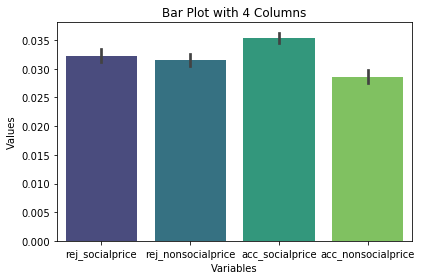

In [59]:

# Prepare data for plotting
fourbarplot_melted = fourbarplot.melt(var_name='ConditionxType', value_name='Price')

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(data=fourbarplot_melted, x='ConditionxType', y='Price', palette='viridis')

# Customize the plot
plt.title('Bar Plot with 4 Columns')
plt.ylabel('Values')
plt.xlabel('Variables')
plt.tight_layout()

# Show the plot
plt.show()


0.032293801568986404
0.035404788038923475
[0.032293801568986404, 0.035404788038923475]


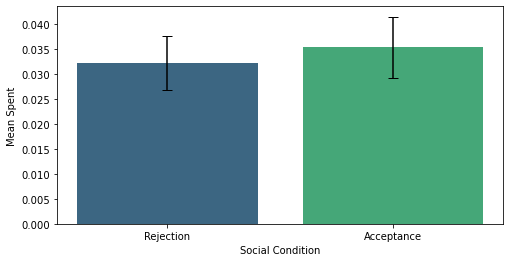

In [46]:
plt.figure(figsize=(8, 4))

# Extract values from the same column in two different DataFrames
#value_1 = rej['social_decisionprice_mean'].iloc[0]
#value_2 = acc['social_decisionprice_mean'].iloc[0]

value_1 = rej['social_decisionprice_mean'].mean()
value_2 = acc['social_decisionprice_mean'].mean()

print(value_1)
print(value_2)

# Create a list of values and labels
values = [value_1, value_2]
labels = ['Rejection', 'Acceptance']

print(values)


# Create the bar plot
sns.barplot(x=labels, y=values, errorbar = ('ci',95), palette='viridis')
#sns.barplot(x=labels, y=values, errorbar = ("ci", 95), capsize = .4, palette='viridis')

#add error bars
plt.errorbar(x=[0, 1], y=values, yerr=errors, fmt='none', ecolor='black', capsize=5)

# Customize the plot
plt.title('')
plt.ylabel('Mean Spent')
plt.xlabel('Social Condition')

# Save the figure
#plt.savefig('meanspent_onsocial_bycondition.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


['social_decisionprice_mean', 'nonsocial_decisionprice_mean']
[0.02933333 0.02923077]


<ipython-input-47-d6b2db95ea1c>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=['Social', 'Non-Social'], y=values, ci=None, palette='viridis')


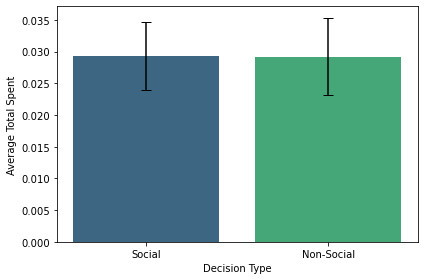

<Figure size 432x288 with 0 Axes>

In [47]:
# Select specific columns to plot

columns_to_plot = ['social_decisionprice_mean', 'nonsocial_decisionprice_mean']


values = shortformdata[columns_to_plot].iloc[0].values
errors = shortformdata[columns_to_plot].std().values  # Standard deviation as error bars

print(values)

# Create the bar plot
sns.barplot(x=['Social', 'Non-Social'], y=values, ci=None, palette='viridis')

# Add error bars using Matplotlib
plt.errorbar(x=range(len(columns_to_plot)), y=values, yerr=errors, fmt='none', ecolor='black', capsize=5)

#customize plot

plt.title('')
plt.ylabel('Average Total Spent')
plt.xlabel('Decision Type')
plt.tight_layout()

plt.figure(figsize=(6, 4))

# Save the figure
plt.savefig('meantotalspent_overall.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

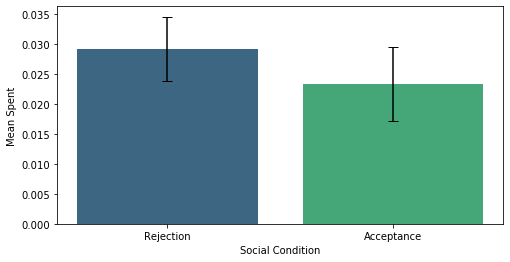

In [39]:
plt.figure(figsize=(8, 4))

# Extract values from the same column in two different DataFrames
value_1 = rej['nonsocial_decisionprice_mean'].iloc[0]
value_2 = acc['nonsocial_decisionprice_mean'].iloc[0]

# Create a list of values and labels
values = [value_1, value_2]
labels = ['Rejection', 'Acceptance']


# Create the bar plot
sns.barplot(x=labels, y=values, ci=None, palette='viridis')

#add error bars
plt.errorbar(x=[0, 1], y=values, yerr=errors, fmt='none', ecolor='black', capsize=5)

# Customize the plot
plt.title('')
plt.ylabel('Mean Spent')
plt.xlabel('Social Condition')

# Save the figure
plt.savefig('meanspent_onnonsocial_bycondition.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [ ]:
#t-test for the difference in 
rej_acc_decisionprice = ttest(rej['social_decisionprice_mean'], acc['social_decisionprice_mean'], paired=True, alternative='less').round(2)
print(rej_acc_decisionprice)


